<a href="https://colab.research.google.com/github/nimendra-ag/Face_Mask_Annotation_Assignment/blob/main/Face_Mask_Annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q albumentations

In [2]:
from __future__ import annotations

In [85]:
from pathlib import Path
from typing import NamedTuple, Optional

from PIL import Image

import gdown
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import shutil

import cv2
import albumentations as A

In [5]:
class BoundingBox(NamedTuple):
    x_center: float
    y_center: float
    x_width: float
    y_height: float
    img_shape: int

    @staticmethod
    def from_list(box: list[float]) -> BoundingBox:
        return BoundingBox(x_center=box[0], y_center=box[1], x_width=box[2], y_height=box[3], img_shape=box[4])

    @staticmethod
    def from_list_of_boxes(boxes: list[list[float]]) -> list[BoundingBox]:
      bboxes: list(BoundingBox)=[]
      for b in boxes:
        bboxes.append(BoundingBox.from_list(b))
      return bboxes

In [37]:
# Helps to display image
# and the bounding boxes on the various objects

def bbox_to_matplotlib_rect(bbox: BoundingBox, color: str):
    """Convert bounding box to matplotlib format."""
    return plt.Rectangle(
        xy=((bbox.x_center-bbox.x_width/2)*bbox.img_shape, (bbox.y_center-bbox.y_height/2)*bbox.img_shape),
        width=bbox.x_width*bbox.img_shape,
        height=bbox.y_height*bbox.img_shape,
        fill=False,
        edgecolor=color,
        linewidth=3,
    )

def add_box_to_figure(figure, bbox: BoundingBox, color: str):
    p = figure.axes.add_patch(bbox_to_matplotlib_rect(bbox, color))
    return p

def make_image_figure_with_bboxes(
    image: np.ndarray,
    bounding_boxes: list[BoundingBox]
):

    plt.figure(figsize=(16, 10))

    figure = plt.imshow(image)

    colors = ["blue"] * len(bounding_boxes)

    # add these anchor boxes we have
    for idx, c in enumerate(colors):
        patch = add_box_to_figure(figure, bounding_boxes[idx], c)


    plt.xlim((0, image.shape[1]))
    plt.ylim((image.shape[0], 0))

    plt.show()


In [7]:
zipped_data = '/content/train.zip'
unzipped_data = ''

with zipfile.ZipFile(zipped_data, 'r') as zip_ref:
    zip_ref.extractall(unzipped_data)

In [8]:
images_folder = '/content/train/images'
labels_folder = '/content/train/labels'

In [25]:
images = []

for file in os.listdir('/content/train/images'):
  img = cv2.imread(os.path.join(images_folder, file))
  if img is None:
    print(file)
  else:
    images.append(img)

In [10]:
images

[array([[[119, 132, 134],
         [119, 132, 134],
         [120, 132, 132],
         ...,
         [ 80,  89,  98],
         [ 80,  89,  98],
         [ 81,  90,  99]],
 
        [[120, 132, 134],
         [120, 132, 134],
         [120, 132, 132],
         ...,
         [ 79,  88,  97],
         [ 79,  88,  97],
         [ 79,  88,  97]],
 
        [[124, 134, 134],
         [123, 133, 133],
         [123, 133, 133],
         ...,
         [ 77,  86,  95],
         [ 77,  86,  95],
         [ 77,  86,  95]],
 
        ...,
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 253, 255],
         [255, 252, 255],
         [255, 252, 255]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [254, 253, 255],
         [254, 252, 255],
         [254, 252, 255]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [252, 253, 255],
  

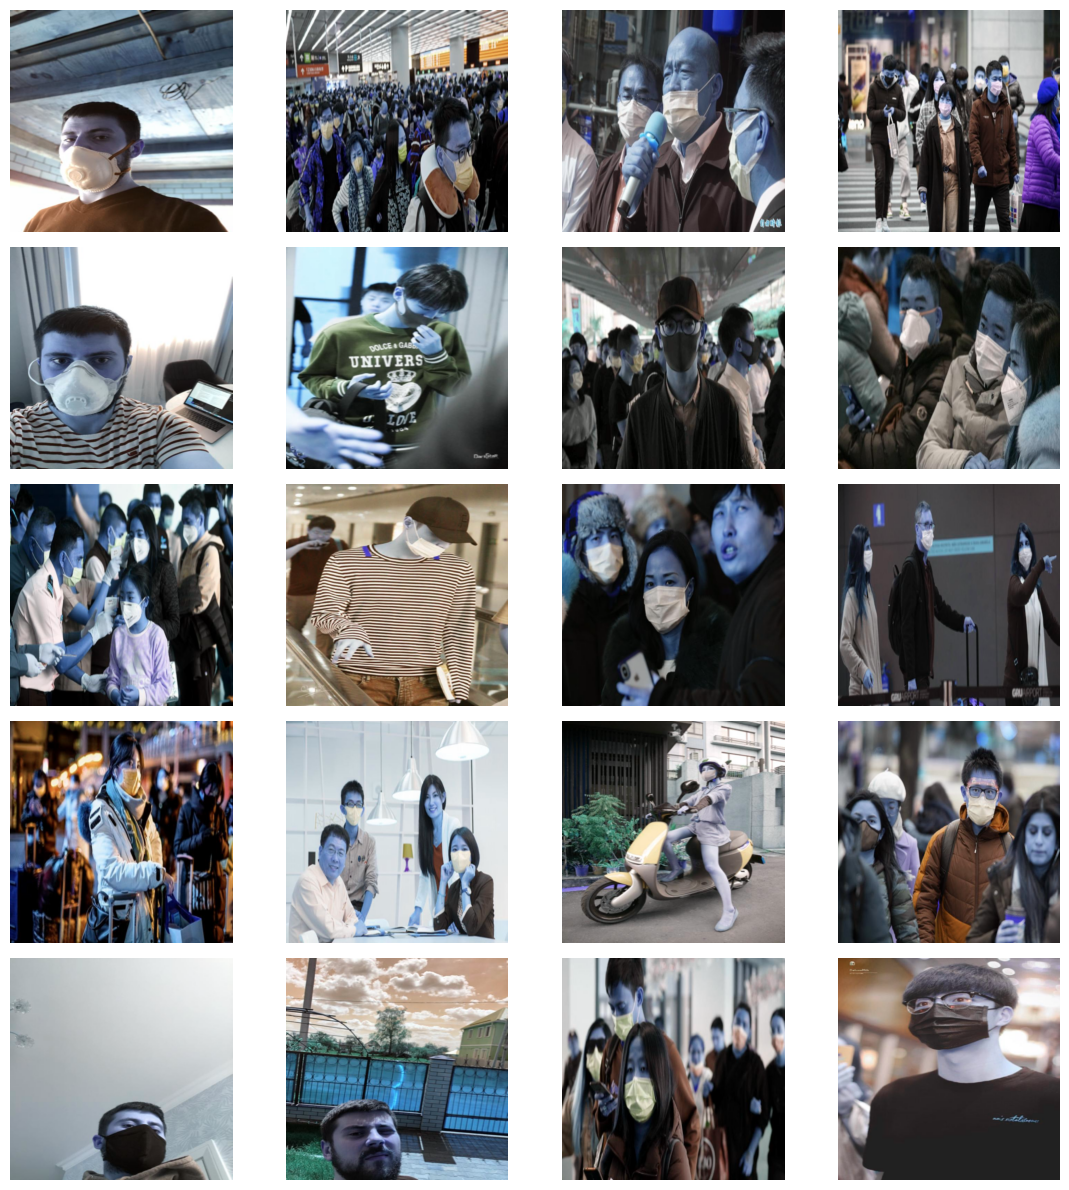

In [31]:
plt.figure(figsize=(12, 12))
for i, img in enumerate(images):
  plt.subplot(5, 4, i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.tight_layout()

In [91]:
class AnnotationFile():
  def __init__(self, file_path:str, file_name:str):
    self.bounded_boxes_in_file:list[BoundingBox]
    self.file_path=file_path
    self.file_name=file_name

In [92]:
labels_flies = os.listdir(labels_folder)
for x in labels_flies:
  print(x)

maksssksksss93_png.rf.2a8250f12ef88abbee9fccd5f5cbdad8.txt
maksssksksss99_png.rf.1e31b126b88a64736eeb23dcfbb8dff2.txt
maksssksksss94_png.rf.cc1e77004da21c3d9099cd859e5856ee.txt
maksssksksss97_png.rf.b10e9cf00c3e4cbdfaac96ea1c4fc96c.txt
maksssksksss88_png.rf.6b698f83db6a6de925efc4b7ccab7a0e.txt
maksssksksss98_png.rf.02cc6cf91c43a40cd1c2448af87bf8ca.txt
maksssksksss91_png.rf.bcd5c15559fbd66d687b76789843e835.txt
maksssksksss851_png.rf.86f319a9e8e94c3a86be3bab47d0412a.txt
maksssksksss86_png.rf.26a7fd76ef178e63fb62111a908bbcb3.txt
maksssksksss95_png.rf.9ca4a55b70fe3a419c1efa10cb15abed.txt
maksssksksss83_png.rf.c0ac4cca7ce554ccf6ed696fa747a656.txt
maksssksksss90_png.rf.0db8100c61d1a4866a69eed39176e320.txt
maksssksksss87_png.rf.ce69c1ce1133f93ed8fcf00b89a122f9.txt
maksssksksss9_png.rf.afd67a465f4b81e7a84c2f41603be122.txt
maksssksksss96_png.rf.7694bf0a558dd70cffbfb217c25cf90f.txt
maksssksksss85_png.rf.e2414c6506e82457bcf9ba663fbecac7.txt
maksssksksss89_png.rf.87d9f8cf1ec692c8c835a323e6f09fe6.t

In [93]:
annotation_files: list[AnnotationFile] = []
for i, file in enumerate(sorted(os.listdir(labels_folder))):
  print("new file", i+1)
  file_path = os.path.join(labels_folder, file)
  annotation_file = AnnotationFile(file_path, file)
  with open(file_path, "r") as file:
    print("opend file", file_path)
    lines = []
    lines = file.readlines()
    bounding_boxes:list[BoundingBox] = []
    if lines == []:
      print("empty file")
      annotation_file.bounded_boxes_in_file = bounding_boxes
      annotation_files.append(annotation_file)
    else:
      for line in lines:
        # print("new line")
        values = line[2:]
        # print(values)
        box = list(map(float, values.split()))
        bounding_boxes.append(box)
      annotation_file.bounded_boxes_in_file = bounding_boxes
      annotation_files.append(annotation_file)

new file 1
opend file /content/train/labels/maksssksksss83_png.rf.c0ac4cca7ce554ccf6ed696fa747a656.txt
new file 2
opend file /content/train/labels/maksssksksss850_png.rf.68ca839956de575978247d84de9aa4b2.txt
new file 3
opend file /content/train/labels/maksssksksss851_png.rf.86f319a9e8e94c3a86be3bab47d0412a.txt
new file 4
opend file /content/train/labels/maksssksksss852_png.rf.93cec8a82e2df7f158f4b950922a06cf.txt
new file 5
opend file /content/train/labels/maksssksksss85_png.rf.e2414c6506e82457bcf9ba663fbecac7.txt
new file 6
opend file /content/train/labels/maksssksksss86_png.rf.26a7fd76ef178e63fb62111a908bbcb3.txt
new file 7
opend file /content/train/labels/maksssksksss87_png.rf.ce69c1ce1133f93ed8fcf00b89a122f9.txt
new file 8
opend file /content/train/labels/maksssksksss88_png.rf.6b698f83db6a6de925efc4b7ccab7a0e.txt
new file 9
opend file /content/train/labels/maksssksksss89_png.rf.87d9f8cf1ec692c8c835a323e6f09fe6.txt
new file 10
opend file /content/train/labels/maksssksksss90_png.rf.0db

In [94]:
for box in annotation_files[1].bounded_boxes_in_file:
  print(box)
print(annotation_files[1].file_path)

[0.1359375, 0.3421875, 0.05, 0.11015625]
[0.40234375, 0.24921875, 0.07109375, 0.103125]
[0.846875, 0.3359375, 0.07578125, 0.11171875]
/content/train/labels/maksssksksss850_png.rf.68ca839956de575978247d84de9aa4b2.txt


In [95]:
len(annotation_files)

20

In [96]:
annotation_files[0].bounded_boxes_in_file

[[0.21328125, 0.35390625, 0.21484375, 0.18515625],
 [0.4640625, 0.5734375, 0.22578125, 0.21953125]]

In [97]:
images = sorted(os.listdir(images_folder))
for file in images:
  print(file)

maksssksksss83_png.rf.c0ac4cca7ce554ccf6ed696fa747a656.jpg
maksssksksss850_png.rf.68ca839956de575978247d84de9aa4b2.jpg
maksssksksss851_png.rf.86f319a9e8e94c3a86be3bab47d0412a.jpg
maksssksksss852_png.rf.93cec8a82e2df7f158f4b950922a06cf.jpg
maksssksksss85_png.rf.e2414c6506e82457bcf9ba663fbecac7.jpg
maksssksksss86_png.rf.26a7fd76ef178e63fb62111a908bbcb3.jpg
maksssksksss87_png.rf.ce69c1ce1133f93ed8fcf00b89a122f9.jpg
maksssksksss88_png.rf.6b698f83db6a6de925efc4b7ccab7a0e.jpg
maksssksksss89_png.rf.87d9f8cf1ec692c8c835a323e6f09fe6.jpg
maksssksksss90_png.rf.0db8100c61d1a4866a69eed39176e320.jpg
maksssksksss91_png.rf.bcd5c15559fbd66d687b76789843e835.jpg
maksssksksss92_png.rf.724cfae4bed1444719a7f767cf601768.jpg
maksssksksss93_png.rf.2a8250f12ef88abbee9fccd5f5cbdad8.jpg
maksssksksss94_png.rf.cc1e77004da21c3d9099cd859e5856ee.jpg
maksssksksss95_png.rf.9ca4a55b70fe3a419c1efa10cb15abed.jpg
maksssksksss96_png.rf.7694bf0a558dd70cffbfb217c25cf90f.jpg
maksssksksss97_png.rf.b10e9cf00c3e4cbdfaac96ea1c4fc96

In [98]:
def bbox_to_matplotlib_rect(bbox, color):
    return plt.Rectangle(
        xy=((bbox.x_center - bbox.x_width / 2) * bbox.img_shape, (bbox.y_center - bbox.y_height / 2) * bbox.img_shape),
        width=bbox.x_width * bbox.img_shape,
        height=bbox.y_height * bbox.img_shape,
        fill=False,
        edgecolor=color,
        linewidth=2,
    )

def make_image_figure_with_bboxes(ax, image, bounding_boxes):
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
    ax.axis("off")

    for bbox in bounding_boxes:
        rect = bbox_to_matplotlib_rect(bbox, "blue")  # Use blue color for all boxes
        ax.add_patch(rect)

# def images_without_bboxes(ax, image):
#     ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
#     ax.axis("off")

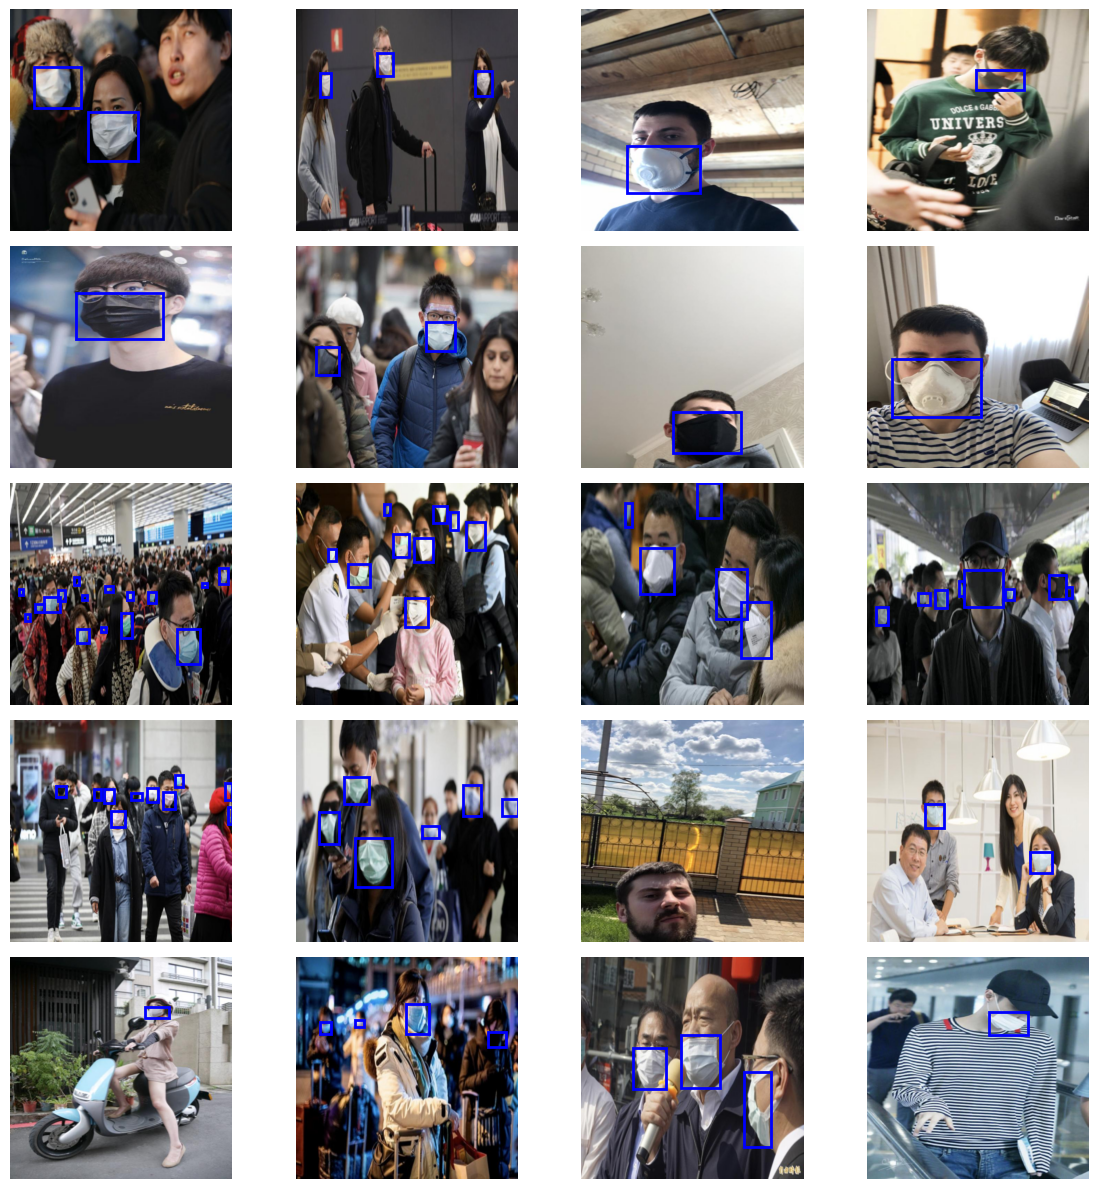

In [99]:
fig, axes = plt.subplots(5, 4, figsize=(12, 12))

for i, image_name in enumerate(sorted(os.listdir(images_folder))):

    image_path = os.path.join(images_folder, image_name)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Skipping {image_name}: Unable to read image.")
        continue

    image_height, image_width, _ = image.shape
    annotation = annotation_files[i]  # Get corresponding annotation

    # if len(annotation.bounded_boxes_in_file) > 0:
    boxes = [
        BoundingBox(
            x_center=box[0], y_center=box[1], x_width=box[2], y_height=box[3], img_shape=image_height
        ) for box in annotation.bounded_boxes_in_file
    ]

    ax = axes[i // 4, i % 4]  # Select subplot
    make_image_figure_with_bboxes(ax, image, boxes)

plt.tight_layout()
plt.show()




1.   resize
2.   center crop
3.   horizontalflip
4.   letter box





## Resizeing

In [100]:
TARGET_HEIGHT = 416
TARGET_WIDTH = 416

In [101]:
resize_transform = A.Compose([
      A.Resize(height=TARGET_HEIGHT, width=TARGET_WIDTH),
    ], bbox_params = A.BboxParams(
        format="yolo",
        label_fields=["class_labels"],
    ))

['0 0.21328124403953552 0.3539062440395355 0.21484375 0.18515628576278687', '0 0.46406249701976776 0.5734375268220901 0.22578123211860657 0.21953126788139343']
['0 0.13593750074505806 0.3421874940395355 0.05000000447034836 0.11015623807907104', '0 0.40234375 0.24921874701976776 0.07109373807907104 0.10312500596046448', '0 0.846875011920929 0.3359375 0.07578122615814209 0.11171877384185791']
['0 0.37031249701976776 0.723437488079071 0.32890620827674866 0.2132812738418579']
['0 0.6000000238418579 0.3203125 0.2132812738418579 0.08906251192092896']
['0 0.4921875149011612 0.31328123062849045 0.39140626788139343 0.20859374105930328']
['0 0.65234375 0.4085937440395355 0.1343749761581421 0.13124996423721313', '0 0.14218750596046448 0.5179687738418579 0.1015625 0.12890625']
['0 0.567187488079071 0.8382812738418579 0.3070312738418579 0.1859375238418579']
['0 0.3125000074505806 0.637499988079071 0.4007812589406967 0.26093757152557373']
['0 0.8023437261581421 0.734375 0.10234379768371582 0.1593749

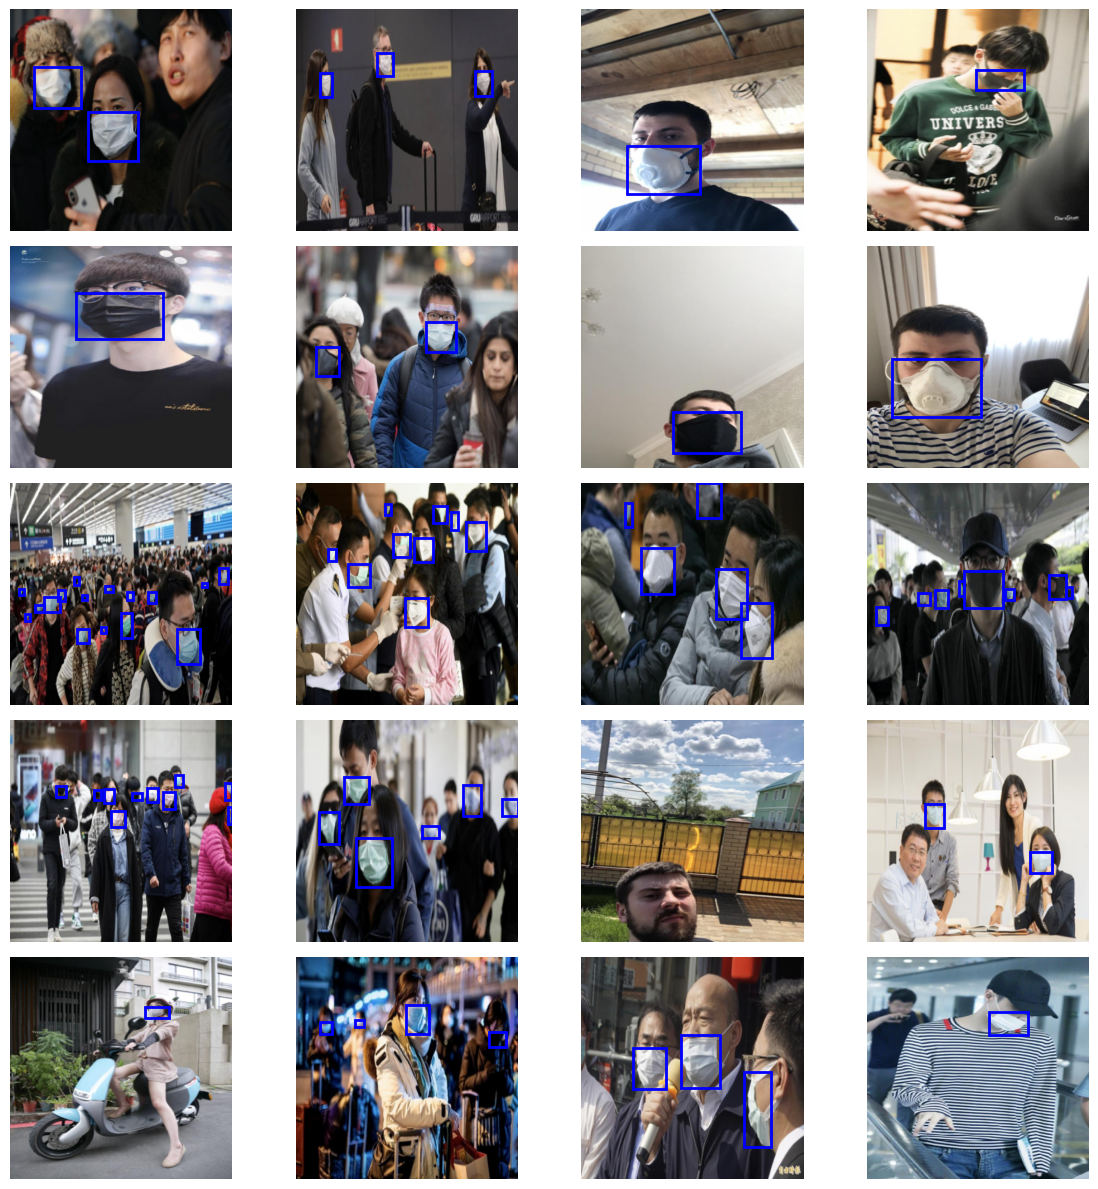

In [106]:
fig, axes = plt.subplots(5, 4, figsize=(12, 12))


resized_images_dir = 'resized_416/images'
os.makedirs(resized_images_dir, exist_ok=True)

resized_labels_dir = 'resized_416/labels'
os.makedirs(resized_labels_dir, exist_ok=True)


for i, image_name in enumerate(sorted(os.listdir(images_folder))):
  image_path = os.path.join(images_folder, image_name)
  image = cv2.imread(image_path)

  if image is None:
    print(f"Skipping {image_name}: Unable to read image.")
    continue

  image_height, image_width, _ = image.shape
  annotation = annotation_files[i]

  boxes = [
      [box[0], box[1], box[2], box[3]]
      for box in annotation.bounded_boxes_in_file
  ]

  resized_transform_result = resize_transform(image=image, bboxes=boxes, class_labels=[0]*len(boxes))

  resized_image = resized_transform_result["image"]
  resized_boxes = resized_transform_result["bboxes"]
  # print(resized_boxes)
  # Update BoundingBox objects with resized coordinates and new image shape
  resized_boxes_objects = [
      BoundingBox(
          x_center=box[0], y_center=box[1], x_width=box[2], y_height=box[3], img_shape=TARGET_HEIGHT  # Update img_shape
      ) for box in resized_boxes
  ]


  ax = axes[i // 4, i % 4]  # Select subplot
  make_image_figure_with_bboxes(ax, resized_image, resized_boxes_objects) # use the updated bounding boxes to plot

  data = Image.fromarray(resized_image)

  # Save to the created directory
  data.save(os.path.join(resized_images_dir, image_name))

  boxes_in_yolo = [f"0 {box[0]} {box[1]} {box[2]} {box[3]}" for box in resized_boxes]
  print(boxes_in_yolo)

  text_file_path = os.path.join(resized_labels_dir, annotation.file_name)

  with open(text_file_path, "w") as file:
    for box in boxes_in_yolo:
      file.write(box + "n")

plt.tight_layout()
plt.show()